In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% %matplotlib notebook

### Data file

Let's read a data file. All data was taken from: 

https://www.transfermarkt.ru/Премьер-лига/ewigeTabelle/wettbewerb/RU1/plus/?saison_id_von=2020&saison_id_bis=2020&tabellenart=alle

File `teams.xlsx` contains data of 4 Moscow football teams:
* FC CSKA 
* FC Lokomotiv	 
* FC Spartak 
* FC Dynamo

Observation period from 1991 to 2019. We received data about:
* Number of wins
* Number of draws
* Number of loses
* Number of points
* Place in each year

In [ ]:
df = pd.read_excel('teams.xlsx', index_col='Team')
df

,1991_W,1991_D,1991_L,1991_P,1991_R,1992_W,1992_D,1992_L,1992_P,1992_R,...,2017_W,2017_D,2017_L,2017_P,2017_R,2018_W,2018_D,2018_L,2018_P,2018_R
Team,,,,,,,,,,,,,,,,,,,,,
CSKA,13,7,6,46,3,12,6,16,42,11,...,14,9,7,51,4,14,8,8,50,4
Lokomotiv,13,7,6,46,4,14,11,9,53,5,...,16,8,6,56,3,16,9,5,57,2
Spartak,18,7,1,61,1,21,11,2,74,1,...,14,7,9,49,5,11,6,13,39,7
Dynamo,14,6,6,48,2,16,10,8,58,3,...,6,15,9,33,12,11,8,11,41,6


Let's count number of wins as a percentage:

    % wins = wins / (wins + draws + loses)

In [ ]:
for i in range(1991, 2019):
    ratio = []
    for fc in list(df.index):
        ratio.append(round(df.loc[fc][str(i) + '_W'] / (df.loc[fc][str(i) + '_W'] + df.loc[fc][str(i) + '_D']
                                                        + df.loc[fc][str(i) + '_L']), 2))
    df[str(i) + '_%W'] = ratio
df

,1991_W,1991_D,1991_L,1991_P,1991_R,1992_W,1992_D,1992_L,1992_P,1992_R,...,2009_%W,2010_%W,2011_%W,2012_%W,2013_%W,2014_%W,2015_%W,2016_%W,2017_%W,2018_%W
Team,,,,,,,,,,,,,,,,,,,,,
CSKA,13,7,6,46,3,12,6,16,42,11,...,0.60,0.43,0.67,0.67,0.63,0.67,0.60,0.57,0.47,0.47
Lokomotiv,13,7,6,46,4,14,11,9,53,5,...,0.43,0.41,0.40,0.57,0.37,0.47,0.33,0.60,0.53,0.53
Spartak,18,7,1,61,1,21,11,2,74,1,...,0.43,0.48,0.50,0.50,0.40,0.50,0.73,0.53,0.47,0.37
Dynamo,14,6,6,48,2,16,10,8,58,3,...,0.30,0.45,0.47,0.50,0.47,0.17,0.60,0.33,0.20,0.37


### Plotting

We may want to track parameters such as:
* Number of points
* Number of wins as a percentage

Let's write a function to get points for each team for axis Y by current column.

In [ ]:
x = list(range(1991, 2019))

def get_points_by_col(fc_team, points_or_percantage):
    """
    Create a list of x and y points to current fc_team by column points_or_percantage.
    fc_team : `CSKA`, `Lokomotiv`, `Spartak` or `Dynamo`
    points_or_percantage : 1 means poitns, 2 means %wins
    """
    y = []
    if points_or_percantage == 1:
        col = '_P'
    else:
        col = '_%W'
    for year in x:
        y.append(df.loc[fc_team][str(year) + col])
    return y

Get y-values of wins as a percentage for each team.

In [ ]:
cska_perc = get_points_by_col('CSKA', 2)
lokomotiv_perc = get_points_by_col('Lokomotiv', 2)
spartak_perc = get_points_by_col('Spartak', 2)
dynamo_perc = get_points_by_col('Dynamo', 2)

Plot a graph for almost 30-year period.

<IPython.core.display.Javascript object>


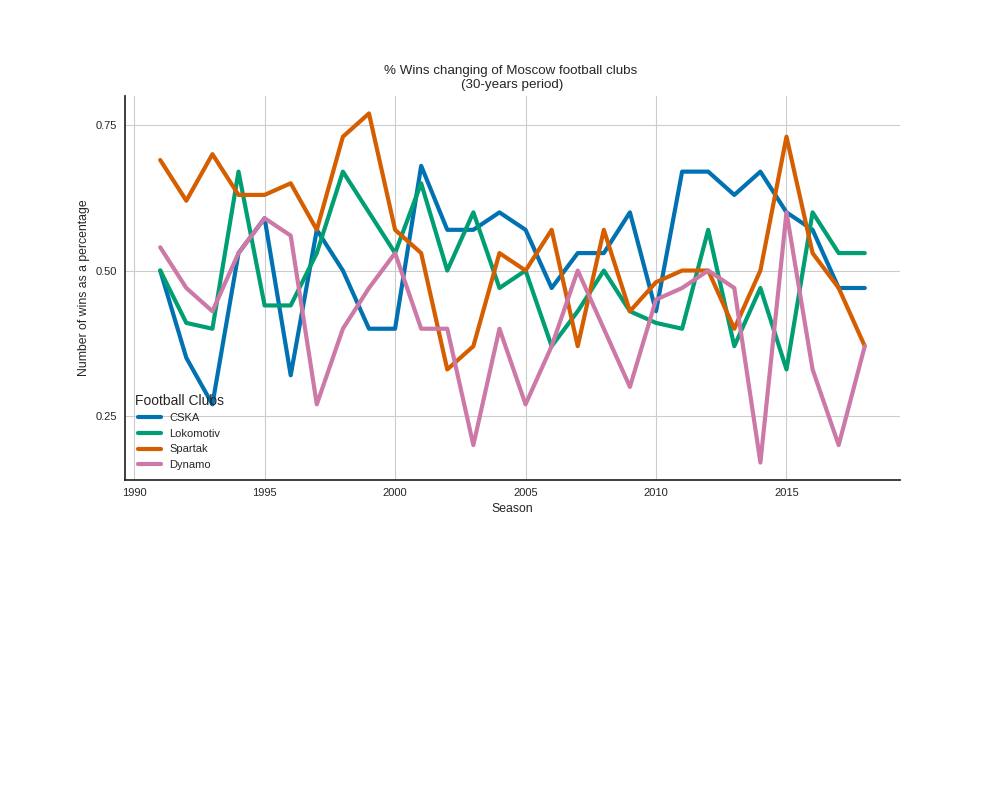

In [ ]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(10, 8))
plt.plot(x, cska_perc, '-', label='CSKA', linewidth=3)
plt.plot(x, lokomotiv_perc, '-', label='Lokomotiv', linewidth=3)
plt.plot(x, spartak_perc, '-', label='Spartak', linewidth=3)
plt.plot(x, dynamo_perc, '-', label='Dynamo', linewidth=3)
plt.xlabel('Season')
plt.ylabel('Number of wins as a percentage')
plt.yticks([0.25, 0.5, 0.75])
plt.title('% Wins changing of Moscow football clubs \n(30-years period)')
plt.legend(title='Football Clubs', loc=3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().grid()
plt.subplots_adjust(bottom=0.4)

### Interactive 

Let's say we want to know what place the team took in each year.

Get y-values for number of points for each team.

In [ ]:
cska_points = get_points_by_col('CSKA', 1)
lokomotiv_points = get_points_by_col('Lokomotiv', 1)
spartak_points = get_points_by_col('Spartak', 1)
dynamo_points = get_points_by_col('Dynamo', 1)

Using `pick_event` let's plot a graph of points for almost 30-year period. By clicking a line you can see what place a current football club took in current year.

<IPython.core.display.Javascript object>


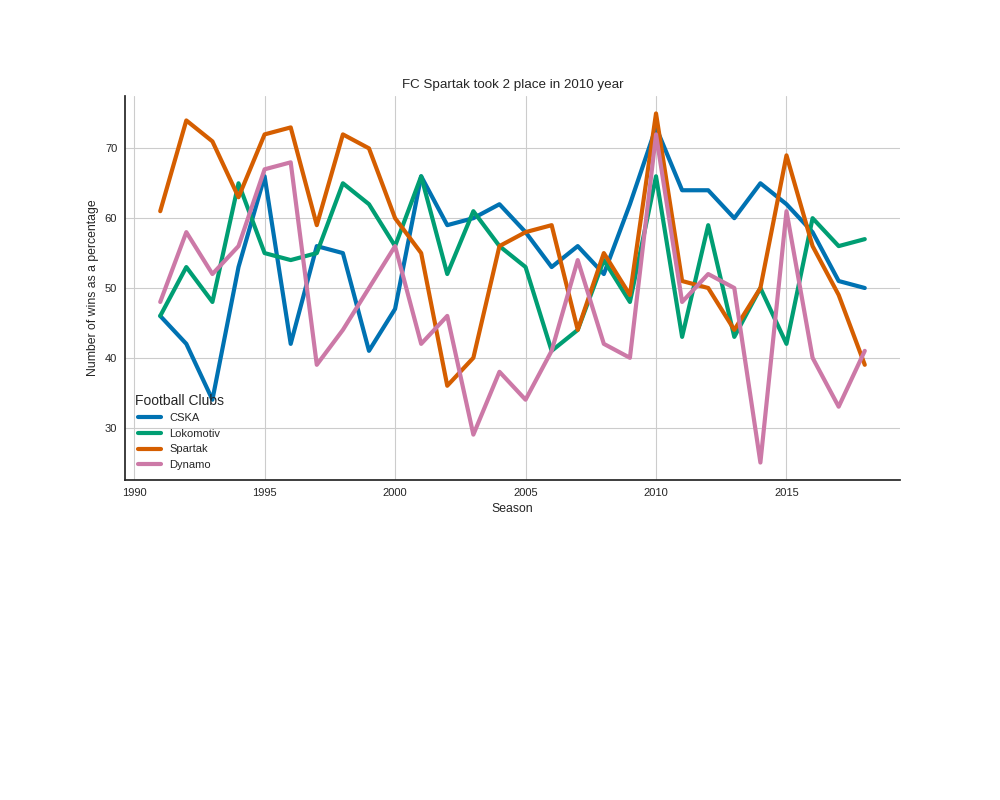

7

In [ ]:
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(10, 8))
plt.plot(x, cska_points, '-', label='CSKA', linewidth=3, picker=5)
plt.plot(x, lokomotiv_points, '-', label='Lokomotiv', linewidth=3, picker=5)
plt.plot(x, spartak_points, '-', label='Spartak', linewidth=3, picker=5)
plt.plot(x, dynamo_points, '-', label='Dynamo', linewidth=3, picker=5)
plt.xlabel('Season')
plt.ylabel('Number of wins as a percentage')
plt.title('Click on the line')
plt.legend(title='Football Clubs', loc=3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().grid()
plt.subplots_adjust(bottom=0.4)

def onpick(event):
    tmp = str(event.artist)
    team = tmp[tmp.find('(')+1:len(tmp)-1]
    xdata = event.artist.get_xdata()[event.ind][0]
    place = int(df.loc[team][str(xdata) + '_R'])
    plt.gca().set_title(f"FC {team} took {place} place in {xdata} year")
plt.gcf().canvas.mpl_connect('pick_event', onpick)